In [13]:
import matplotlib.animation as animation
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import gridspec
#dataall=np.load('dataall_save.npy')
dataallo=np.load('../dat/dataall_save_o819.npy')#*1e-5#Myr=>yr
dataallk=np.load('../dat/dataall_save_k819-4.npy')#*1e-5
dataallp=np.load('../dat/dataall_save_p819-4.npy')#*1e-5
# ../analy/  anl-k4/  anl-p7/  anltest_o/

In [14]:
#PEMdot
Ms=(np.arange(10)+1)/10
print(Ms)
#PEo=

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [15]:
phystiming=np.array([
               [100,29.2,22.3,18.9,16.6,15.9,16.6,15.8,15.8,15.8],
               [6.1,5.3,4.5,4.0,3.6,3.3,3.1,2.9,2.7,2.6],
               [6,6.7,7.6,8.3,8.9,9.4,9.8,10.2,10.5,10.8],
               [3.5,4,4.7,5.3,5.7,6,6.4,6.7,6.9,7.1],
               [5,4.8,4.5,4.3,4.1,3.9,3.7,3.5,3.4,3.2],
               [2.8,2.8,2.6,2.4,2.2,2.1,2.0,1.9,1.8,1.7],
                ])
#phystiming=np.ones((6,10))*0.1
#print(phystiming[0][5])
# cond-2 mass-1
PE=[1.668e-10,4.965e-10,9.398e-10,1.478e-09,2.099e-09,2.797e-09,3.565e-09,4.399e-09,5.295e-09,6.25e-09]
#Frac0=np.zeros((6,10,3))
Frac0=np.zeros((6,10,4))
#print(Frac)
for cond in range(8):
    for ms in range(10):
        #if ms == 9:
            k=1+ms+(cond*10)
            pltdat=dataallk[:,:,k]     #mdotPE
            pltdatp=dataallp[:,:,k]
            pltdatk=dataallk[:,:,k]
            T=(np.array(range(299)))/10
            #rcon=1     #au keisan  5=>0.027au   39 =>1au  125=>10au  rcon
            rcon=5     #au keisan  5=>0.027au   39 =>1au  125=>10au  rcon

            trb=pltdat[rcon,604:903]
            wnd=-pltdat[rcon,905:1204]
            rvz=pltdat[rcon,1206:1505]
            atrq=pltdat[rcon,1507:1806]
            pgrf=pltdat[rcon,1808:2107]
            dmz=pltdat[rcon,2109:2408]
            
            trbp=pltdatp[rcon,604:903]
            wndp=-pltdatp[rcon,905:1204]
            rvzp=pltdatp[rcon,1206:1505]
            atrqp=pltdatp[rcon,1507:1806]
            pgrfp=pltdatp[rcon,1808:2107]
            dmzp=pltdatp[rcon,2109:2408] 
            
            trbk=pltdatk[rcon,604:903]
            wndk=-pltdatk[rcon,905:1204]
            rvzk=pltdatk[rcon,1206:1505]
            atrqk=pltdatk[rcon,1507:1806]
            pgrfk=pltdatk[rcon,1808:2107]
            dmzk=pltdatk[rcon,2109:2408]
            
            wid=(1+ms)/5
            mss=10/(1+ms)
            Macc=np.zeros(299)
            Maccw=np.zeros(299)
            Mdw=np.zeros(299)
            Mpe=np.zeros(299)
            Mtot0=np.ones(299)*((1+ms)/10)*0.12
            
            Maccp=np.zeros(299)
            Maccwp=np.zeros(299)
            Mdwp=np.zeros(299)
            Mpep=np.zeros(299)
            Mtot0p=np.ones(299)*((1+ms)/10)*0.12
            
            Macck=np.zeros(299)
            Maccwk=np.zeros(299)
            Mdwk=np.zeros(299)
            Mpek=np.zeros(299)
            Mtot0k=np.ones(299)*((1+ms)/10)*0.12
            for t in range(299):
                if cond in[4,5,6,7]:
                    Macc[t]=-trb[:t].sum()*0.1*1000000  #0.1Myr
                    Maccw[t]=wnd[:t].sum()*0.1*1000000  #0.1Myr
                    Mdw[t]=((dmz))[:t].sum()*0.1*1000000
                    
                    Maccp[t]=-trbp[:t].sum()*0.1*1000000  #0.1Myr
                    Maccwp[t]=wndp[:t].sum()*0.1*1000000  #0.1Myr
                    Mdwp[t]=((dmzp))[:t].sum()*0.1*1000000
                    
                    Macck[t]=-trbk[:t].sum()*0.1*1000000  #0.1Myr
                    Maccwk[t]=wndk[:t].sum()*0.1*1000000  #0.1Myr
                    Mdwk[t]=((dmzk))[:t].sum()*0.1*1000000
                else:
                    Macc[t]=-trb[:t].sum()*0.1*1000000  #0.1Myr
                    Maccp[t]=-trbp[:t].sum()*0.1*1000000  #0.1Myr
                    Macc[t]=-trb[:t].sum()*0.1*1000000  #0.1Myr
                if cond in[2,3,6,7]:
                    Mpe[t]=PE[ms]*t*0.1*1000000
                    Mpe[t]=PE[ms]*t*0.1*1000000
                    Mpe[t]=PE[ms]*t*0.1*1000000
                #else:
                    #Mpe[t]=0
            Mtot=Mtot0-Macc-Mdw-Mpe
            Facc=Macc#/(Mtot0-Mtot)
            Faccw=Maccw#/(Mtot0-Mtot)
            Fdw=Mdw#/(Mtot0-Mtot)
            Fpe=Mpe#/(Mtot0-Mtot)
            if cond>1:
                condw=cond-2
                timing=int(phystiming[condw][9]*10)
                Frac0[condw][ms][0]=Facc[timing]#*100
                Frac0[condw][ms][3]=Faccw[timing]#*100
                Frac0[condw][ms][1]=Fdw[timing]#*100
                Frac0[condw][ms][2]=Fpe[timing]#*100
                
                #print(Facc[timing],Fdw[timing],Fpe[timing],Facc[timing]+Fdw[timing]+Fpe[timing])

#print(Frac)
Frac0[Frac0 == 0] = -10
#print(Frac)
Frac=Frac0
colorlist = ['#ff7f0e', '#2ca02c', '#1f77b4']

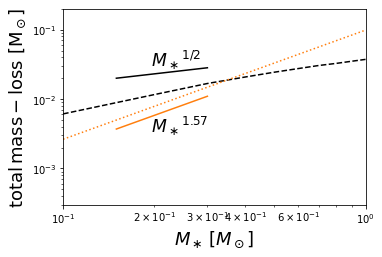

In [16]:
mss=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# cond-2 mass-1
#PEi PEa DWi DWa PEDWi PEDWa
for cond in range (6):
    if cond ==0:
        plt.cla()
        for M in range(3):
            if M==0:
                plt.plot(mss,Frac[cond,:,M],color="k", linestyle = "dashed",label=r'$\.{M}_r$')
            if M==1:
                plt.plot(mss,Frac[cond,:,M],color=colorlist[1],label=r'$\.{M}_z$ DW')
            if M==2:
                plt.plot(mss,Frac[cond,:,M],color=colorlist[0], linestyle = "dotted")
        plt.ylim(3e-4, 2e-1)
        plt.xlim(0.1, 1)
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel(r'$M_\ast\,[M_\odot]$', fontsize=18)
        plt.ylabel(r'$\mathrm{total\, mass-loss\,\,[M_\odot]}$', fontsize=18)
        #plt.rcParams['figure.subplot.bottom'] = 0.3
        #plt.rcParams['figure.subplot.left'] = 0.25
        plt.subplots_adjust(bottom=0.2)
        plt.subplots_adjust(left=0.2)
        arrowxy=np.array([
               [100,29.2,22.3,18.9,16.6,15.9,16.6,15.8,15.8,15.8],
               [6.1,5.3,4.5,4.0,3.6,3.3,3.1,2.9,2.7,2.6],
               [6,6.7,7.6,8.3,8.9,9.4,9.8,10.2,10.5,10.8],
               [3.5,4,4.7,5.3,5.7,6,6.4,6.7,6.9,7.1],
               [5,4.8,4.5,4.3,4.1,3.9,3.7,3.5,3.4,3.2],
               [2.8,2.8,2.6,2.4,2.2,2.1,2.0,1.9,1.8,1.7],])
        a0=[2,1.5,2,1/2] #length x y slope#acc
        a1=[2,1.5,0.37,1.57] #length x y slope#PE
        a2=[2,2,1,7/4] #length x y slope#DW
        plt.plot([0.1*a0[1], 0.1*a0[0]*a0[1]], [0.01*a0[2], 0.01*(a0[0]**(a0[3]))*a0[2]],color="k")#acc
        plt.plot([0.1*a1[1], 0.1*a1[0]*a1[1]], [0.01*a1[2], 0.01*(a1[0]**(a1[3]))*a1[2]],color=colorlist[0])#PE
        #plt.plot([0.1*a2[1], 0.1*a2[0]*a2[1]], [0.01*a2[2], 0.01*(a2[0]**(a2[3]))*a2[2]],color="g")#DW
        plt.text(0.13*a0[1], 0.015*a0[2],r"${M_\ast}^{1/2}$", fontsize="xx-large")#acc
        plt.text(0.13*a1[1], 0.009*a1[2],r"${M_\ast}^{1.57}$", fontsize="xx-large")#PE
        #plt.text(0.13*a2[1], 0.025*a2[2],r"${M_\ast}^{7/4}$", fontsize="xx-large")#DW
        #plt.show()
        plt.savefig("mtotmass"+str(cond)+"condmasstime04k.jpg")

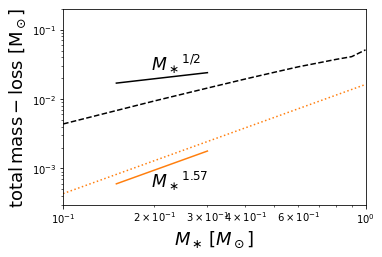

In [17]:
mss=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# cond-2 mass-1
#PEi PEa DWi DWa PEDWi PEDWa
for cond in range (6):
    if cond ==1:
        plt.cla()
        for M in range(3):
            if M==0:
                plt.plot(mss,Frac[cond,:,M],color="k", linestyle = "dashed",label=r'$\.{M}_r$')
            if M==1:
                plt.plot(mss,Frac[cond,:,M],color=colorlist[1],label=r'$\.{M}_z$ DW')
            if M==2:
                plt.plot(mss,Frac[cond,:,M],color=colorlist[0], linestyle = "dotted")
        plt.ylim(3e-4, 2e-1)
        plt.xlim(0.1, 1)
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel(r'$M_\ast\,[M_\odot]$', fontsize=18)
        plt.ylabel(r'$\mathrm{total\, mass-loss\,\,[M_\odot]}$', fontsize=18)
        #plt.rcParams['figure.subplot.bottom'] = 0.3
        #plt.rcParams['figure.subplot.left'] = 0.25
        plt.subplots_adjust(bottom=0.2)
        plt.subplots_adjust(left=0.2)
        arrowxy=np.array([
               [100,29.2,22.3,18.9,16.6,15.9,16.6,15.8,15.8,15.8],
               [6.1,5.3,4.5,4.0,3.6,3.3,3.1,2.9,2.7,2.6],
               [6,6.7,7.6,8.3,8.9,9.4,9.8,10.2,10.5,10.8],
               [3.5,4,4.7,5.3,5.7,6,6.4,6.7,6.9,7.1],
               [5,4.8,4.5,4.3,4.1,3.9,3.7,3.5,3.4,3.2],
               [2.8,2.8,2.6,2.4,2.2,2.1,2.0,1.9,1.8,1.7],])
        a0=[2,1.5,1.7,1/2] #length x y slope#acc
        a1=[2,1.5,0.06,1.57] #length x y slope#PE
        a2=[2,2,1,7/4] #length x y slope#DW
        plt.plot([0.1*a0[1], 0.1*a0[0]*a0[1]], [0.01*a0[2], 0.01*(a0[0]**(a0[3]))*a0[2]],color="k")#acc
        plt.plot([0.1*a1[1], 0.1*a1[0]*a1[1]], [0.01*a1[2], 0.01*(a1[0]**(a1[3]))*a1[2]],color=colorlist[0])#PE
        #plt.plot([0.1*a2[1], 0.1*a2[0]*a2[1]], [0.01*a2[2], 0.01*(a2[0]**(a2[3]))*a2[2]],color="g")#DW
        plt.text(0.13*a0[1], 0.015*a0[2],r"${M_\ast}^{1/2}$", fontsize="xx-large")#acc
        plt.text(0.13*a1[1], 0.009*a1[2],r"${M_\ast}^{1.57}$", fontsize="xx-large")#PE
        #plt.text(0.13*a2[1], 0.025*a2[2],r"${M_\ast}^{7/4}$", fontsize="xx-large")#DW
        #plt.show()
        plt.savefig("mtotmass"+str(cond)+"condmasstime04.jpg")

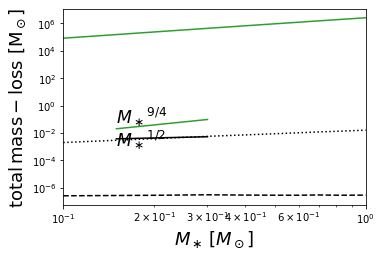

In [18]:
mss=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# cond-2 mass-1
#PEi PEa DWi DWa PEDWi PEDWa
for cond in range (6):
    if cond ==2:
        plt.cla()
        for M in range(4):
            if M==0:
                plt.plot(mss,Frac[cond,:,M],color="k", linestyle = "dashed",label=r'$\.{M}_r$')
            if M==3:
                plt.plot(mss,Frac[cond,:,M],color="k", linestyle = "dotted",label=r'$\.{M}_r$')
            if M==1:
                plt.plot(mss,Frac[cond,:,M],color=colorlist[1],label=r'$\.{M}_z$ DW')
            if M==2:
                plt.plot(mss,Frac[cond,:,M],color=colorlist[0], linestyle = "dotted")
        #plt.ylim(3e-4, 2e-1)
        plt.xlim(0.1, 1)
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel(r'$M_\ast\,[M_\odot]$', fontsize=18)
        plt.ylabel(r'$\mathrm{total\, mass-loss\,\,[M_\odot]}$', fontsize=18)
        #plt.rcParams['figure.subplot.bottom'] = 0.3
        #plt.rcParams['figure.subplot.left'] = 0.25
        plt.subplots_adjust(bottom=0.2)
        plt.subplots_adjust(left=0.2)
        arrowxy=np.array([
               [100,29.2,22.3,18.9,16.6,15.9,16.6,15.8,15.8,15.8],
               [6.1,5.3,4.5,4.0,3.6,3.3,3.1,2.9,2.7,2.6],
               [6,6.7,7.6,8.3,8.9,9.4,9.8,10.2,10.5,10.8],
               [3.5,4,4.7,5.3,5.7,6,6.4,6.7,6.9,7.1],
               [5,4.8,4.5,4.3,4.1,3.9,3.7,3.5,3.4,3.2],
               [2.8,2.8,2.6,2.4,2.2,2.1,2.0,1.9,1.8,1.7],])
        a0=[2,1.5,0.37,1/2] #length x y slope#acc
        a1=[2,1.5,0.37,1.57] #length x y slope#PE
        a2=[2,1.5,2,9/4] #length x y slope#DW
        plt.plot([0.1*a0[1], 0.1*a0[0]*a0[1]], [0.01*a0[2], 0.01*(a0[0]**(a0[3]))*a0[2]],color="k")#acc
        #plt.plot([0.1*a1[1], 0.1*a1[0]*a1[1]], [0.01*a1[2], 0.01*(a1[0]**(a1[3]))*a1[2]],color="r")#PE
        plt.plot([0.1*a2[1], 0.1*a2[0]*a2[1]], [0.01*a2[2], 0.01*(a2[0]**(a2[3]))*a2[2]],color=colorlist[1])#DW
        plt.text(0.1*a0[1], 0.003*a0[2],r"${M_\ast}^{1/2}$", fontsize="xx-large")#acc
        #plt.text(0.13*a1[1], 0.009*a1[2],r"${M_\ast}^{1.57}$", fontsize="xx-large")#PE
        plt.text(0.1*a2[1], 0.025*a2[2],r"${M_\ast}^{9/4}$", fontsize="xx-large")#DW
        #plt.show()
        plt.savefig("mtotmass"+str(cond)+"condmasstime04.jpg")

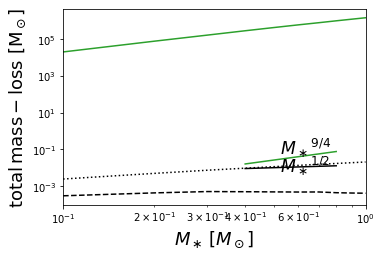

In [19]:
mss=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# cond-2 mass-1
#PEi PEa DWi DWa PEDWi PEDWa
for cond in range (6):
    if cond ==3:
        plt.cla()
        for M in range(4):
            if M==0:
                plt.plot(mss,Frac[cond,:,M],color="k", linestyle = "dashed",label=r'$\.{M}_r$')
            if M==3:
                plt.plot(mss,Frac[cond,:,M],color="k", linestyle = "dotted",label=r'$\.{M}_r$')
            if M==1:
                plt.plot(mss,Frac[cond,:,M],color=colorlist[1],label=r'$\.{M}_z$ DW')
            if M==2:
                plt.plot(mss,Frac[cond,:,M],color="r", linestyle = "dotted")
        #plt.ylim(3e-4, 2e-1)
        plt.xlim(0.1, 1)
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel(r'$M_\ast\,[M_\odot]$', fontsize=18)
        plt.ylabel(r'$\mathrm{total\, mass-loss\,\,[M_\odot]}$', fontsize=18)
        #plt.rcParams['figure.subplot.bottom'] = 0.3
        #plt.rcParams['figure.subplot.left'] = 0.25
        plt.subplots_adjust(bottom=0.2)
        plt.subplots_adjust(left=0.2)
        arrowxy=np.array([
               [100,29.2,22.3,18.9,16.6,15.9,16.6,15.8,15.8,15.8],
               [6.1,5.3,4.5,4.0,3.6,3.3,3.1,2.9,2.7,2.6],
               [6,6.7,7.6,8.3,8.9,9.4,9.8,10.2,10.5,10.8],
               [3.5,4,4.7,5.3,5.7,6,6.4,6.7,6.9,7.1],
               [5,4.8,4.5,4.3,4.1,3.9,3.7,3.5,3.4,3.2],
               [2.8,2.8,2.6,2.4,2.2,2.1,2.0,1.9,1.8,1.7],])
        a0=[2,4,0.9,1/2] #length x y slope#acc
        a1=[2,3.5,0.37,1.57] #length x y slope#PE
        a2=[2,4,1.6,9/4] #length x y slope#DW
        plt.plot([0.1*a0[1], 0.1*a0[0]*a0[1]], [0.01*a0[2], 0.01*(a0[0]**(a0[3]))*a0[2]],color="k")#acc
        #plt.plot([0.1*a1[1], 0.1*a1[0]*a1[1]], [0.01*a1[2], 0.01*(a1[0]**(a1[3]))*a1[2]],color="r")#PE
        plt.plot([0.1*a2[1], 0.1*a2[0]*a2[1]], [0.01*a2[2], 0.01*(a2[0]**(a2[3]))*a2[2]],color=colorlist[1])#DW
        plt.text(0.13*a0[1], 0.006*a0[2],r"${M_\ast}^{1/2}$", fontsize="xx-large")#acc
        #plt.text(0.13*a1[1], 0.009*a1[2],r"${M_\ast}^{1.57}$", fontsize="xx-large")#PE
        plt.text(0.13*a2[1], 0.035*a2[2],r"${M_\ast}^{9/4}$", fontsize="xx-large")#DW
        #plt.show()
        plt.savefig("mtotmass"+str(cond)+"condmasstime04.jpg")

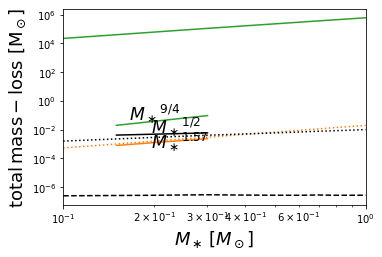

In [20]:
mss=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# cond-2 mass-1
#PEi PEa DWi DWa PEDWi PEDWa
for cond in range (6):
    if cond ==4:
        plt.cla()
        for M in range(4):
            if M==0:
                plt.plot(mss,Frac[cond,:,M],color="k", linestyle = "dashed",label=r'$\.{M}_r$')
            if M==3:
                plt.plot(mss,Frac[cond,:,M],color="k", linestyle = "dotted",label=r'$\.{M}_r$')
            if M==1:
                plt.plot(mss,Frac[cond,:,M],color=colorlist[1],label=r'$\.{M}_z$ DW')
            if M==2:
                plt.plot(mss,Frac[cond,:,M],color=colorlist[0], linestyle = "dotted")
        #plt.ylim(3e-4, 2e-1)
        plt.xlim(0.1, 1)
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel(r'$M_\ast\,[M_\odot]$', fontsize=18)
        plt.ylabel(r'$\mathrm{total\, mass-loss\,\,[M_\odot]}$', fontsize=18)
        #plt.rcParams['figure.subplot.bottom'] = 0.3
        #plt.rcParams['figure.subplot.left'] = 0.25
        plt.subplots_adjust(bottom=0.2)
        plt.subplots_adjust(left=0.2)
        arrowxy=np.array([
               [100,29.2,22.3,18.9,16.6,15.9,16.6,15.8,15.8,15.8],
               [6.1,5.3,4.5,4.0,3.6,3.3,3.1,2.9,2.7,2.6],
               [6,6.7,7.6,8.3,8.9,9.4,9.8,10.2,10.5,10.8],
               [3.5,4,4.7,5.3,5.7,6,6.4,6.7,6.9,7.1],
               [5,4.8,4.5,4.3,4.1,3.9,3.7,3.5,3.4,3.2],
               [2.8,2.8,2.6,2.4,2.2,2.1,2.0,1.9,1.8,1.7],])
        a0=[2,1.5,0.42,1/2] #length x y slope#acc
        a1=[2,1.5,0.08,1.57] #length x y slope#PE
        a2=[2,1.5,2,9/4] #length x y slope#DW
        plt.plot([0.1*a0[1], 0.1*a0[0]*a0[1]], [0.01*a0[2], 0.01*(a0[0]**(a0[3]))*a0[2]],color="k")#acc
        plt.plot([0.1*a1[1], 0.1*a1[0]*a1[1]], [0.01*a1[2], 0.01*(a1[0]**(a1[3]))*a1[2]],color=colorlist[0])#PE
        plt.plot([0.1*a2[1], 0.1*a2[0]*a2[1]], [0.01*a2[2], 0.01*(a2[0]**(a2[3]))*a2[2]],color=colorlist[1])#DW
        plt.text(0.13*a0[1], 0.014*a0[2],r"${M_\ast}^{1/2}$", fontsize="xx-large")#acc
        plt.text(0.13*a1[1], 0.006*a1[2],r"${M_\ast}^{1.57}$", fontsize="xx-large")#PE
        plt.text(0.11*a2[1], 0.022*a2[2],r"${M_\ast}^{9/4}$", fontsize="xx-large")#DW
        #plt.show()
        plt.savefig("mtotmass"+str(cond)+"condmasstime04.jpg")

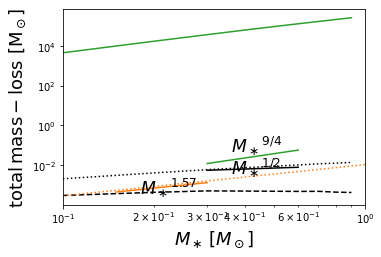

In [21]:
mss=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# cond-2 mass-1
#PEi PEa DWi DWa PEDWi PEDWa
for cond in range (6):
    if cond ==5:
        plt.cla()
        for M in range(4):
            if M==0:
                plt.plot(mss,Frac[cond,:,M],color="k", linestyle = "dashed",label=r'$\.{M}_r$')
            if M==3:
                plt.plot(mss,Frac[cond,:,M],color="k", linestyle = "dotted",label=r'$\.{M}_r$')
            if M==1:
                plt.plot(mss,Frac[cond,:,M],color=colorlist[1],label=r'$\.{M}_z$ DW')
            if M==2:
                plt.plot(mss,Frac[cond,:,M],color=colorlist[0], linestyle = "dotted")
        #plt.ylim(3e-4, 2e-1)
        plt.xlim(0.1, 1)
        plt.xscale("log")
        plt.yscale("log")
        plt.xlabel(r'$M_\ast\,[M_\odot]$', fontsize=18)
        plt.ylabel(r'$\mathrm{total\, mass-loss\,\,[M_\odot]}$', fontsize=18)
        #plt.rcParams['figure.subplot.bottom'] = 0.3
        #plt.rcParams['figure.subplot.left'] = 0.25
        plt.subplots_adjust(bottom=0.2)
        plt.subplots_adjust(left=0.2)
        arrowxy=np.array([
               [100,29.2,22.3,18.9,16.6,15.9,16.6,15.8,15.8,15.8],
               [6.1,5.3,4.5,4.0,3.6,3.3,3.1,2.9,2.7,2.6],
               [6,6.7,7.6,8.3,8.9,9.4,9.8,10.2,10.5,10.8],
               [3.5,4,4.7,5.3,5.7,6,6.4,6.7,6.9,7.1],
               [5,4.8,4.5,4.3,4.1,3.9,3.7,3.5,3.4,3.2],
               [2.8,2.8,2.6,2.4,2.2,2.1,2.0,1.9,1.8,1.7],])
        a0=[2,3,0.55,1/2] #length x y slope#acc
        a1=[2,1.5,0.044,1.57] #length x y slope#PE
        a2=[2,3,1.2,9/4] #length x y slope#DW
        plt.plot([0.1*a0[1], 0.1*a0[0]*a0[1]], [0.01*a0[2], 0.01*(a0[0]**(a0[3]))*a0[2]],color="k")#acc
        plt.plot([0.1*a1[1], 0.1*a1[0]*a1[1]], [0.01*a1[2], 0.01*(a1[0]**(a1[3]))*a1[2]],color=colorlist[0])#PE
        plt.plot([0.1*a2[1], 0.1*a2[0]*a2[1]], [0.01*a2[2], 0.01*(a2[0]**(a2[3]))*a2[2]],color=colorlist[1])#DW
        plt.text(0.12*a0[1], 0.0065*a0[2],r"${M_\ast}^{1/2}$", fontsize="xx-large")#acc
        plt.text(0.12*a1[1], 0.008*a1[2],r"${M_\ast}^{1.57}$", fontsize="xx-large")#PE
        plt.text(0.12*a2[1], 0.035*a2[2],r"${M_\ast}^{9/4}$", fontsize="xx-large")#DW
        #plt.show()
        plt.savefig("mtotmass"+str(cond)+"condmasstime04.jpg")

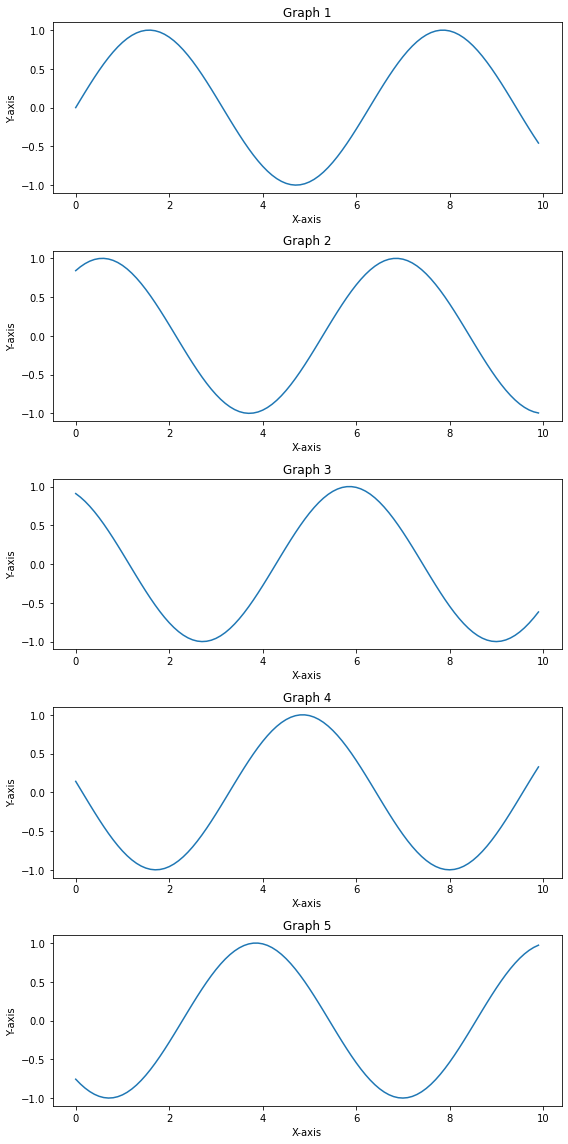

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# データを作成する
x = np.arange(0, 10, 0.1)
y_list = []
for i in range(5):
    y = np.sin(x + i)
    y_list.append(y)

# 複数のグラフを描画する
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 16))
for i, ax in enumerate(axes):
    ax.plot(x, y_list[i])
    ax.set_title('Graph {}'.format(i+1))
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

# グラフを表示する
plt.tight_layout()
plt.show()